# 최적화 함수 (Optimizer)

In [359]:
import numpy as np
import matplotlib.pyplot as plt

### 간단한 SGD

In [360]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x ** 2

def gradient(x):
    return 2 * x

In [361]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2, 2)
    history = [w]
    
    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
    
    return history

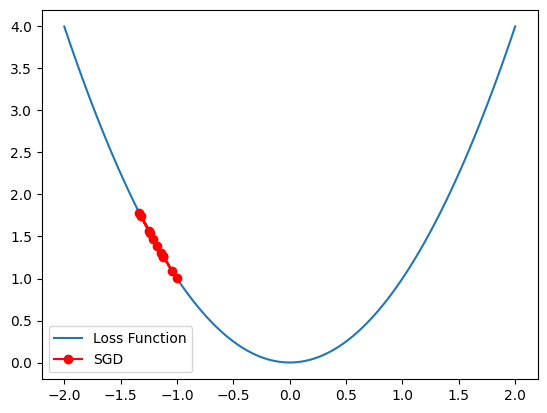

In [362]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')

plt.legend()
plt.show()

### 모멘텀 추가

In [363]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2, 2)
    v = 0
    history = [w]
    
    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        v = momentum * v - lr * grad
        w -= lr * grad
        history.append(w)
    
    return history

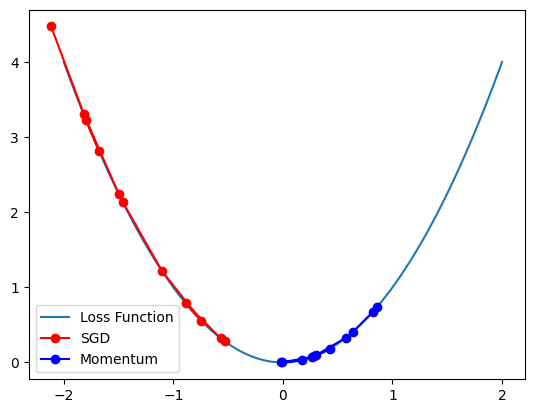

In [364]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')
plt.legend()
plt.show()

### 학습률에 따른 SGD

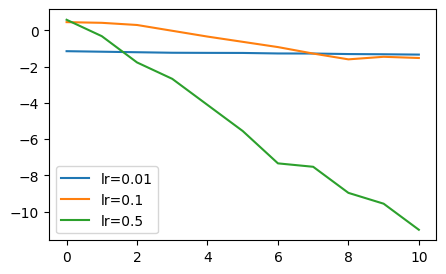

In [365]:
learning_rate = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rate]

plt.figure(figsize=(5, 3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={ learning_rate[i] }')
plt.legend()
plt.show()    

### AdaGrad

In [366]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

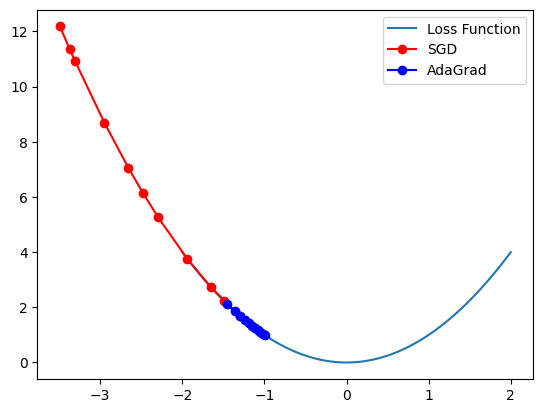

In [367]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.legend()
plt.show()

### RMSprop

In [368]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h += (beta * h) + ((1 - beta) * grad ** 2)
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

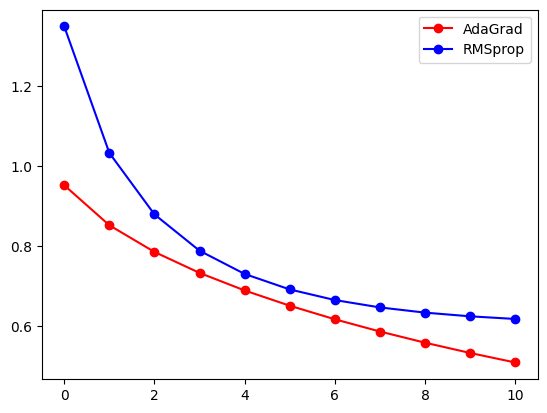

In [369]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

### Adam

In [370]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]
    
    for t in range(1, epochs+1):
        grad = gradient(w)
        
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat

        history.append(w)
            
    return history

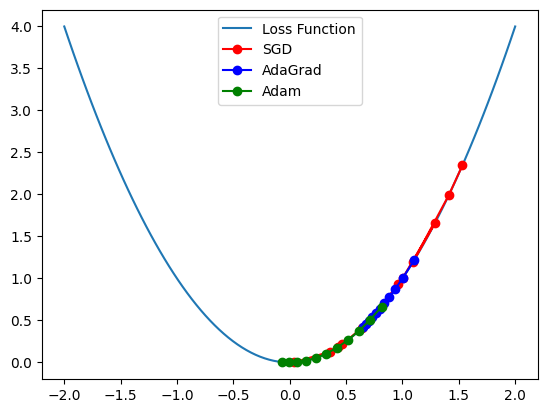

In [371]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()

### Pytorch 활용 > SGD vs Adam 비교

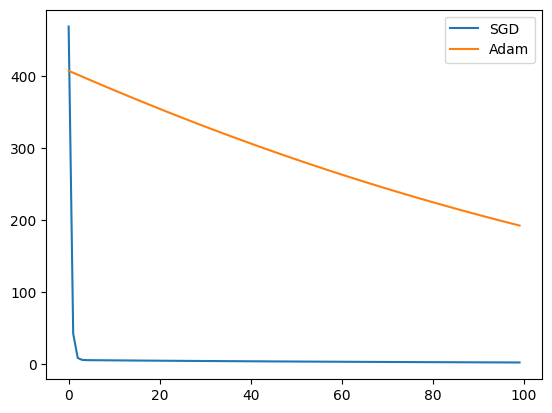

In [372]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

X = torch.rand(100, 1) * 10
y = 3 * X + 5 + (torch.randn(100, 1) * 0.3)

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()
    outputs = model_sgd(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_sgd.step()
    losses_sgd.append(loss.item())
    
for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())
    
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()

# 종합 실습

In [373]:
# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(probs, labels):
    m = labels.shape[0]
    log_liklihood = -np.log(probs + 1e-8) * labels
    loss = np.sum(log_liklihood) / m
    return loss

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten()
}

X = np.array([digits['0'], digits['1']])
y = np.array([1, 0], [0, 1])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

# 4. 가중치 초기화
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = zeros((1, output_size))

# 5. 학습 (역전파 + SGD 최적화)
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    z1 = np.dot(X, W1) + b1
    r1 = relu(z1)

    z2 = np.dot(r1, W2) + b2
    r2 = relu(z2)
    
    # 손실 계산
    

    # 역전파
    delta2 = (r2 - y) * relu_d(z2)
    grad_W2 = np.outer(r1, delta2)

    delta1 = np.dot(W2, delta2) * relu_d(z1)
    grad_W1 = np.outer(X, delta1)
    
    # 가중치 업데이트
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
    
    # epoch 100번째마다 손실 출력
    print()

# 6. 예측 데이터
def predict(x):
    return

test_digit = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)
print('예측 결과 값:', predict(test_digit))